# Початок

In [6]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sootersaalu/amazon-top-50-bestselling-books-2009-2019")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/sootersaalu/amazon-top-50-bestselling-books-2009-2019/versions/1


Прочитайте csv файл (використовуйте функцію read_csv)

In [7]:
# МІЙ СПОСІБ ДЛЯ ЧИТАННЯ ФАЙЛУ З GOOGLE DRIVE, ЯКИЙ НАПИСАВ Я.
# РОБЛЮ ДОМАШКИ У COLAB, ТОИУ ТРИМАЮ НОУТБУКИ НА G DRIVE.
# ТОМУ ЗРУЧНО ТРИМАТИ .CSV ТЕЖ ТУТ
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/My Drive/GOIT/DATA SCIENCE/goit-ds-hw05.3_bestsellers.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# ТУТ ПРИЗНАЮСЬ ЧЕСНО, ЩО АВТОР НЕ Я. ТАКОГО Я ЩЕ НЕ ВМІЮ, ДОПОМІГ ШІ.
# СПОСІБ ДОДАВ ДЛЯ ТОГО,
# ЩОБ МЕНТОР МІГ ПЕРЕВІРИТИ КОД БЕЗ ДОСТУПУ ДО МОГО ДИСКУ.

import pandas as pd
import zipfile
import io
import requests

# URL для завантаження
url = "https://www.kaggle.com/api/v1/datasets/download/sootersaalu/amazon-top-50-bestselling-books-2009-2019?dataset_version_number=1"

# Завантажуємо ZIP-файл з URL
response = requests.get(url)

# Перевірка, чи успішно завантажено
if response.status_code == 200:
    # Відкриваємо ZIP-файл
    with zipfile.ZipFile(io.BytesIO(response.content)) as z:
        # Виводимо список файлів в архіві
        print(z.namelist())

        # Читаємо CSV з першого файлу в архіві
        with z.open(z.namelist()[0]) as f:
            df = pd.read_csv(f)

    # Переглянути перші кілька рядків
    print(df.head())
else:
    print("Не вдалося завантажити файл")

['bestsellers with categories.csv']
                                                Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     Author  User Rating  Reviews  Price  Year        Genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  


Виведіть перші п'ять рядків (використовується функція head)

In [9]:
print(df.head(5))

                                                Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     Author  User Rating  Reviews  Price  Year        Genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  


Виведіть розміри датасету (використовуйте атрибут shape)0

In [10]:
print(df.shape)

(550, 7)


Про скільки книг зберігає дані датасет?

**Відповідь:** 550.

Для спрощення подальшої роботи давайте трохи підправимо назви змінних.

In [11]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

# Первинне дослідження даних

Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)

In [12]:
print(df.isna().sum())

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64


Чи є в якихось змінних пропуски?

**Відповідь:** Ні.

Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)

In [13]:
print(df['genre'].unique())

['Non Fiction' 'Fiction']


Які є унікальні жанри?

**Відповідь:** Non Fiction, Fiction.

Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')

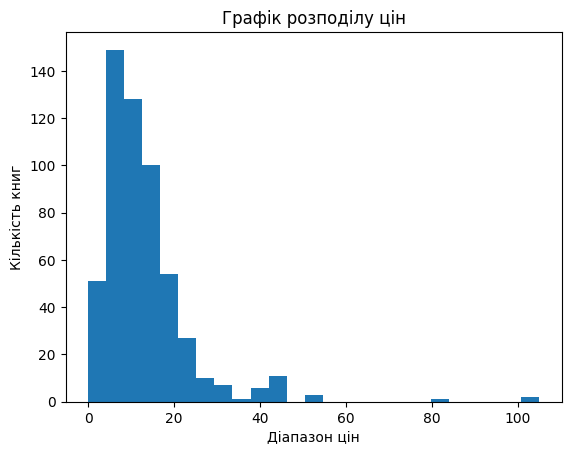

In [14]:
import matplotlib.pyplot as plt

df['price'].plot(kind='hist', bins=25)
plt.xlabel('Діапазон цін')
plt.ylabel('Кількість книг')
plt.title('Графік розподілу цін')
plt.show()

Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)

In [15]:
result = {}
result['MAX'] = df['price'].max()
result['MIN'] = df['price'].min()
result['MEAN'] = df['price'].mean()
result['MEDIAN'] = df['price'].median()
for key, value in result.items():
    print(f'{key}: {value}')

MAX: 105
MIN: 0
MEAN: 13.1
MEDIAN: 11.0


Максимальна ціна?

**Відповідь:** 105.

Мінімальна ціна?

**Відповідь:** 0.

Середня ціна?

**Відповідь:** 13,1.

Медіанна ціна?

**Відповідь:** 11.

# Пошук та сортування даних

Який рейтинг у датасеті найвищий?

**Відповідь:**

In [16]:
print(df['user_rating'].max())

4.9


Скільки книг мають такий рейтинг?

**Відповідь:**

In [17]:
print(df[df['user_rating'] == df['user_rating'].max()].shape[0])

52


Яка книга має найбільше відгуків?

**Відповідь:**

In [18]:
print(df[df['reviews'] == df['reviews'].max()]['name'])

534    Where the Crawdads Sing
Name: name, dtype: object


З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)?

**Відповідь:**

In [19]:
print(df[(df['year'] == 2015) & (df['price'] == df[df['year'] == 2015]['price'].max())]['name'])

277    Publication Manual of the American Psychologic...
Name: name, dtype: object


Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)?

**Відповідь:**

In [20]:
print(df[(df['year'] == 2010) & (df['genre'] == 'Fiction')].shape[0])

20


Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)?

**Відповідь:**

In [21]:
print(df[(df['user_rating'] == 4.9) & (df['year'].isin([2010, 2011]))].shape[0])

1


І насамкінець, давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values).

In [22]:
sorted_df = df[(df['year'] == 2015) & (df['price'] < 8)].sort_values(by='price')

Яка книга остання у відсортованому списку?

**Відповідь:**

In [23]:
print(sorted_df.tail(1))

                                      name       author  user_rating  reviews  \
253  Old School (Diary of a Wimpy Kid #10)  Jeff Kinney          4.8     6169   

     price  year    genre  
253      7  2015  Fiction  


# Агрегування даних та з'єднання таблиць

Для початку давайте подивимося на максимальну та мінімальну ціни для кожного з жанрів (використовуйте функції groupby та agg, для підрахунку мінімальних та максимальних значень використовуйте max та min). Не беріть усі стовпці, виберіть тільки потрібні вам

In [24]:
genre_sort_price = df.groupby('genre').agg({'price': ['max', 'min']})

Максимальна ціна для жанру Fiction

In [25]:
print(genre_sort_price.loc['Fiction']['price']['max'])

82


Мінімальна ціна для жанру Fiction

In [26]:
print(genre_sort_price.loc['Fiction']['price']['min'])

0


Максимальна ціна для жанру Non Fiction

In [27]:
print(genre_sort_price.loc['Non Fiction']['price']['max'])

105


Мінімальна ціна для жанру Non Fiction

In [28]:
print(genre_sort_price.loc['Non Fiction']['price']['min'])

0


Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів (використовуйте функції groupby та agg, для підрахунку кількості використовуйте count). Не беріть усі стовпці, виберете тільки потрібні

In [29]:
books_count = df.groupby('author').agg({'name': 'count'})

Якої розмірності вийшла таблиця?

In [30]:
print(books_count.shape)

(248, 1)


Який автор має найбільше книг?

In [31]:
authors_count = books_count.reset_index()
print(authors_count[authors_count['name'] == authors_count['name'].max()]['author'].iloc[0])

Jeff Kinney


Скільки книг цього автора?

In [32]:
print(authors_count[authors_count['name'] == authors_count['name'].max()]['name'].iloc[0])

12


Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора (використовуйте функції groupby та agg, для підрахунку середнього значення використовуйте mean). Не беріть усі стовпці, виберете тільки потрібні

In [33]:
rating_avg = df.groupby('author').agg({'user_rating': 'mean'})

У якого автора середній рейтинг мінімальний?

In [34]:
print(rating_avg[rating_avg['user_rating'] == rating_avg['user_rating'].min()].index[0])

Donna Tartt


Який у цього автора середній рейтинг?

In [35]:
print(rating_avg[rating_avg['user_rating'] == rating_avg['user_rating'].min()]['user_rating'].iloc[0])

3.9


З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг (Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну

In [36]:
combain = pd.concat([books_count, rating_avg], axis=1)
print(combain)

                            name  user_rating
author                                       
Abraham Verghese               2     4.600000
Adam Gasiewski                 1     4.400000
Adam Mansbach                  1     4.800000
Adir Levy                      1     4.800000
Admiral William H. McRaven     1     4.700000
...                          ...          ...
Walter Isaacson                3     4.566667
William Davis                  2     4.400000
William P. Young               2     4.600000
Wizards RPG Team               3     4.800000
Zhi Gang Sha                   2     4.600000

[248 rows x 2 columns]


Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values)

In [37]:
combain = combain.sort_values(by=['name', 'user_rating'])

Який автор перший у списку?

In [38]:
print(combain.index[0])

Muriel Barbery


# Візуалізація

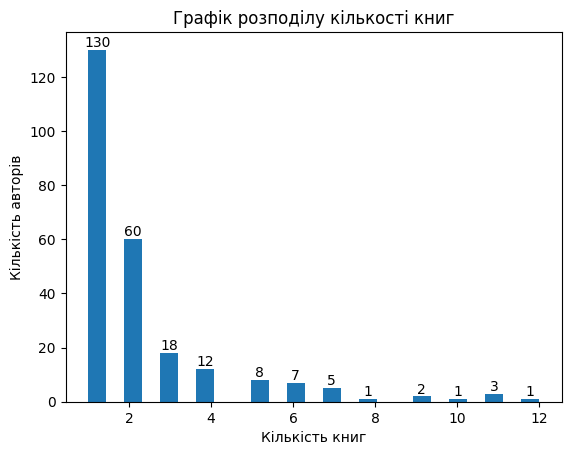

In [39]:
import matplotlib.pyplot as plt

authors_count['name'].plot(kind='hist', bins=25)
plt.xlabel('Кількість книг')
plt.ylabel('Кількість авторів')
plt.title('Графік розподілу кількості книг')

bin_edges = plt.gca().patches
for patch in bin_edges:
    # Отримання координат прямокутника гістограми
    height = patch.get_height()
    x_center = patch.get_x() + patch.get_width() / 2
    if height > 0:
        plt.text(x_center, height, str(int(height)), ha='center', va='bottom')

plt.show()



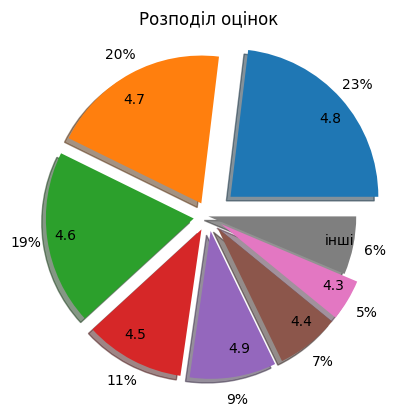

In [40]:
data = df['user_rating'].value_counts()
low_values = data[data < 25].sum()
data = data[data >= 25]
data['інші'] = low_values

labels = data.index.tolist()
explode=[]
for _ in labels:
    explode.append(0.1)
explode[-1] = 0
explode[0] = 0.2

plt.pie(
    data,
    labels=labels,
    shadow=True,
    explode=explode,
    autopct="%.f%%",
    pctdistance=1.15,
    labeldistance=0.8,
)
plt.title("Розподіл оцінок")
plt.show()


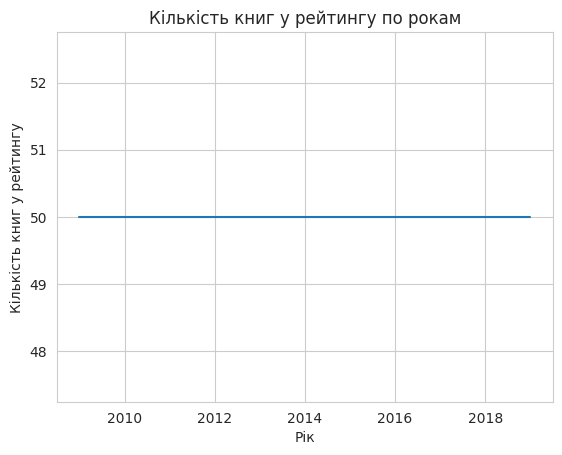

In [41]:
import seaborn as sns

sns.set_style("whitegrid")
data = df['year'].value_counts().reset_index()
data.columns = ['Рік', 'Кількість книг у рейтингу']
plt.title('Кількість книг у рейтингу по рокам')
plt.xlabel('Рік')
plt.ylabel('Кількість книг у рейтингу')
sns.lineplot(x='Рік', y='Кількість книг у рейтингу',data=data)
plt.show()
